# Combine stations 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sys
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter
from scipy.spatial.distance import euclidean
import matplotlib.gridspec as gridspec
import os


from scipy.spatial.distance import euclidean

# from utils_crosssection import cross_section,project_onto_cs,compute_longlat_along_axis

sys.path.append('src/')
from notebook_functions import getFP, getSgram,plotCumul2,findStationHypDist, plotMedianBins,findEventPairHypDist,plotLocZoomMeters,plotDepthZoomMeters,calcRadius
from notebook_functions import calcRadius, latlon2meter,calcCCMatrix,calcCCMatrixFP, plotStem3,addRID
from notebook_functions import plotLocZoom4, plotCircleDepth,plotDepthZoom7, formatWS2021,getProportionWS21



from notebook_functions import GradeLocErrorLatLon, plotDepthZoom8, calcCCMatrix, plotLocZoom5, plotStem5, plotClusWF6,calcDfStats2, calcDfStats
from matplotlib.gridspec import GridSpec


In [3]:
## figure specs

#quarter pagea
width1 = 3.74016
height1 = 4.52756

#full page
width2 = 7.48031
height2 = 9.05512

## Load and format 2014 and NCSN catalog


In [5]:
cat_NCSN = pd.read_csv('../data/catalogs/NCADDiff_5km_2019_500mFault_WS21.csv')



In [6]:

cat_rep_2014_df =  formatWS2021('../data/catalogs/NCA_REPQcat_20210919_noMeta_v2.csv')

cat_WS21 = cat_NCSN[cat_NCSN.event_ID.astype('int').isin(list(cat_rep_2014_df.event_ID))]

len(cat_WS21)

27674 repeater earthquakes in 7714  sequences


1024

# Load station catalogs with repeaters

In [10]:

cat_BAV = pd.read_csv('../data/catalogs/SA_REQS_v28_updatedCat_MaxExp_WSloc_2.csv')
cat_BRV = pd.read_csv('../data/catalogs/SA_REQS_v28_BRV_updatedCat_MaxExp_WSloc_2.csv')
cat_BBN = pd.read_csv('../data/catalogs/SA_REQS_v28_BBN_updatedCat_MaxExp_WSloc_2.csv')
cat_BPI = pd.read_csv('../data/catalogs/SA_REQS_v28_BPI_updatedCat_MaxExp_WSloc_2.csv')
cat_BSG = pd.read_csv('../data/catalogs/SA_REQS_v28_BSG_updatedCat_MaxExp_WSloc_2.csv')
cat_BEM = pd.read_csv('../data/catalogs/SA_REQS_v28_BEM_updatedCat_MaxExp_WSloc_2.csv')
cat_BVL = pd.read_csv('../data/catalogs/SA_REQS_v28_BVL_updatedCat_MaxExp_WSloc_2.csv')

cat_BAV['Station'] = ['BAV' for i in range(len(cat_BAV))]
cat_BPI['Station'] = ['BPI' for i in range(len(cat_BPI))]
cat_BRV['Station'] = ['BRV' for i in range(len(cat_BRV))]
cat_BBN['Station'] = ['BBN' for i in range(len(cat_BBN))]
cat_BSG['Station'] = ['BSG' for i in range(len(cat_BSG))]
cat_BEM['Station'] = ['BEM' for i in range(len(cat_BEM))]
cat_BVL['Station'] = ['BVL' for i in range(len(cat_BVL))]


cat_BAV['Cluster'] = [str(c) + '_BAV' for c in cat_BAV.Cluster]
cat_BPI['Cluster'] = [str(c) + '_BPI' for c in cat_BPI.Cluster]
cat_BRV['Cluster'] = [str(c) + '_BRV' for c in cat_BRV.Cluster]
cat_BBN['Cluster'] = [str(c) + '_BBN' for c in cat_BBN.Cluster]
cat_BSG['Cluster'] = [str(c) + '_BSG' for c in cat_BSG.Cluster]
cat_BEM['Cluster'] = [str(c) + '_BEM' for c in cat_BEM.Cluster]
cat_BVL['Cluster'] = [str(c) + '_BVL' for c in cat_BVL.Cluster]

len(cat_BSG),len(cat_BVL),len(cat_BPI),len(cat_BRV),len(cat_BAV),len(cat_BEM),len(cat_BBN)


(2512, 2354, 2000, 1602, 1596, 1504, 1192)

In [11]:
cat_BSG = addRID(cat_BSG,cat_rep_2014_df)
cat_BVL = addRID(cat_BVL,cat_rep_2014_df)
cat_BPI = addRID(cat_BPI,cat_rep_2014_df)
cat_BEM = addRID(cat_BEM,cat_rep_2014_df)
cat_BRV = addRID(cat_BRV,cat_rep_2014_df)
cat_BAV = addRID(cat_BAV,cat_rep_2014_df)
cat_BBN = addRID(cat_BBN,cat_rep_2014_df)




834
761
622
595
558
583
429


# What proportion of WS21 are these catalogs?

In [12]:
list_cats1=[cat_BAV,cat_BPI,cat_BRV,cat_BBN,cat_BSG,cat_BEM,cat_BVL]
list_cats2=[cat_BPI,cat_BRV,cat_BBN,cat_BSG,cat_BEM,cat_BVL,cat_BAV]
list_cats3=[cat_BRV,cat_BBN,cat_BSG,cat_BEM,cat_BVL,cat_BAV,cat_BPI]
list_cats4=[cat_BBN,cat_BSG,cat_BEM,cat_BVL,cat_BAV,cat_BPI,cat_BRV]
list_cats5=[cat_BSG,cat_BEM,cat_BVL,cat_BAV,cat_BPI,cat_BRV,cat_BBN]
list_cats6=[cat_BEM,cat_BVL,cat_BSG,cat_BAV,cat_BPI,cat_BRV,cat_BBN]
list_cats7=[cat_BVL,cat_BEM,cat_BSG,cat_BAV,cat_BPI,cat_BRV,cat_BBN]


list_list_cats = [list_cats1,list_cats2,list_cats3,list_cats4,list_cats6,list_cats7]

/Users/theresasawi/opt/anaconda3/envs/seismo2/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


Text(0.5, 1.0, 'Maximum: 0.9844')

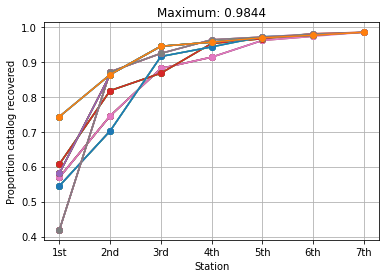

In [13]:


for list_cats in list_list_cats:
    cat_comb_temp = pd.DataFrame()
    list_props = []    
    for stat in list_cats:
        cat_comb_temp = cat_comb_temp.append(stat)
        prop = getProportionWS21(cat_comb_temp.drop_duplicates('event_ID'),cat_WS21)
#         print(prop)
        list_props.append(prop)
        plt.plot(list_props,'o-');
        
ax = plt.gca()
ax.set_xticklabels(['1st','2nd','3rd','4th','5th','6th','7th'])
ax.set_xticks(range(len(list_props)));
ax.set_xlabel('Station')
ax.set_ylabel('Proportion catalog recovered')
ax.grid('on')
ax.set_title(f"Maximum: {max(list_props):.4f}")
# plt.savefig('../reports/figures/percentRecovered_numStations.png')

In [14]:

stat_list = [cat_BSG,cat_BVL,cat_BPI,cat_BRV,cat_BAV,cat_BEM,cat_BBN] # in descending order of proportion of WS21

props = [getProportionWS21(catt,cat_WS21) for catt in stat_list]
props


[0.814453125,
 0.7431640625,
 0.607421875,
 0.544921875,
 0.5693359375,
 0.5810546875,
 0.4189453125]

# Count number of stations recorded at

In [15]:

cat_comb = pd.concat(stat_list)


cat_comb_ev = cat_comb.sort_values('event_ID')

In [18]:



cat_comb_ev_stat = pd.DataFrame()
with pd.option_context('mode.chained_assignment', None): #supress SettingWithCopyWarning
    
    for i, ev in enumerate(np.unique(cat_comb_ev.event_ID)):
        if i%300==0:
            print(i, '/', len(np.unique(cat_comb_ev.event_ID)))

        df = cat_comb_ev[cat_comb_ev.event_ID == ev].copy()

        df[['BAV', 'BRV', 'BBN', 'BPI', 'BSG', 'BEM', 'BVL']] = np.zeros((len(df), 7)) # order of stations not important

        for j, stat in enumerate(df.Station):
            df[f'{stat}'].iloc[:] = 1

        cat_comb_ev_stat = cat_comb_ev_stat.append(df)  


0
300
600
900
1200
1500
1800
2100
2400
2700
3000
3300


In [19]:

columns_keep3=['event_ID',
                'RID',
                'lat',
                'long',
                'depth_km',
                'dX', 'dY', 'dZ',
                'year',
                'month',
                'day',
                'hour',
                'minute',
                'second',
                'magnitude',
                'Cluster',
                'Station',
                'BAV',
                'BPI',
                'BBN',
                'BRV',
                'BSG',
                'BEM',
                'BVL',
                'NumStations']

cat_comb_ev_stat['NumStations'] = cat_comb_ev_stat.iloc[:,-7:].sum(axis=1)    

cat_comb_ev_stat_trim = cat_comb_ev_stat[columns_keep3]

cat_BPI2 = cat_BPI.merge(cat_comb_ev_stat_trim,how='left')
cat_BAV2 = cat_BAV.merge(cat_comb_ev_stat_trim,how='left')
cat_BBN2 = cat_BBN.merge(cat_comb_ev_stat_trim,how='left')
cat_BRV2 = cat_BRV.merge(cat_comb_ev_stat_trim,how='left')
cat_BSG2 = cat_BSG.merge(cat_comb_ev_stat_trim,how='left')
cat_BEM2 = cat_BEM.merge(cat_comb_ev_stat_trim,how='left')
cat_BVL2 = cat_BVL.merge(cat_comb_ev_stat_trim,how='left')






In [20]:
# check for singleton clusters -- would be bad

lenClus = []

for clus in set(cat_BSG2.Cluster):
    lc = len(cat_BSG2[cat_BSG2.Cluster==clus])

    lenClus.append(lc)
    
    if lc == 1:
        break
    
    
    
1 in lenClus



False

# Combine 7 catalogs

In [21]:
def addEventClusters(cat_add,cat_BXX4):

    for i, ev in enumerate(cat_add.event_ID):


        if ev not in list(cat_BXX4.event_ID):
    #         print(ev)
            df = cat_add[cat_add.event_ID==ev]
            cl = df.Cluster.iloc[0]
            df_cl = cat_add[cat_add.Cluster==cl]   


            if any(i in list(cat_BXX4.event_ID) for i in list(df_cl.event_ID)):

                for ev in list(df_cl.event_ID):
                    try:

                        clus_new = cat_BXX4[cat_BXX4.event_ID==ev].Cluster.iloc[0]

                        df_cl.Cluster.iloc[:] = clus_new

                    except:
                        pass

            cat_BXX4 = cat_BXX4.append(df_cl)

    cat_BXX4.drop_duplicates(['event_ID'],inplace=True)
    return cat_BXX4

In [22]:
stat_list2 = [cat_BSG2,cat_BVL2,cat_BPI2,cat_BRV2,cat_BAV2,cat_BEM2,cat_BBN2]


In [ ]:

## this block takes awhile


cat_BSG3 = cat_BSG2.copy()
with pd.option_context('mode.chained_assignment', None): #supress SettingWithCopyWarning

    for i, ev in enumerate(cat_BSG2.event_ID):

        if i%300==0:
            print(i, '/', len(cat_BSG2.event_ID))

        df = cat_BSG2[cat_BSG2.event_ID==ev]
        clus = df.Cluster.iloc[0]

        for statcat in stat_list2[1:]:
            try:        
                cl = statcat[statcat.event_ID==ev].Cluster.iloc[0].copy()
                df_cl = statcat[statcat.Cluster==cl].copy()
                df_cl.Cluster = clus
                df = df.append(df_cl)
                cat_BSG3 = cat_BSG3.append(df)
            except:
                pass

    cat_BSG4 = cat_BSG3.copy()      

    for statcat in stat_list2[1:]: 
        cat_BSG4 = addEventClusters(statcat,cat_BSG4)


os.system("say 'program complete'")
len(cat_BSG4)

In [ ]:
# check for singleton clusters -- would be bad


lenClus = []

for clus in set(cat_BSG4.Cluster):
    lc = len(cat_BSG4[cat_BSG4.Cluster==clus])

    lenClus.append(lc)
    
    if lc == 1:
        break
    
    
    
1 in lenClus



# Check for duplicates

In [ ]:
cat_clus_all_nodupes = cat_BSG4.drop_duplicates('event_ID').sort_values(by='Cluster')[columns_keep3]

len(cat_BSG4), len(cat_BSG4.drop_duplicates('event_ID'))

In [ ]:
# check for singleton clusters -- would be bad

lenClus = []

for clus in set(cat_clus_all_nodupes.Cluster):
    lc = len(cat_clus_all_nodupes[cat_clus_all_nodupes.Cluster==clus])

    lenClus.append(lc)
    
    if lc == 1:
        break
    
    
    
1 in lenClus



# We allow for single-station detections

In [ ]:

numStationsDetect = 1

cat_clus_all_nodupes_2stations = cat_clus_all_nodupes[cat_clus_all_nodupes.NumStations>=numStationsDetect]

print(len(cat_clus_all_nodupes_2stations), len(cat_clus_all_nodupes))

getProportionWS21(cat_clus_all_nodupes_2stations,cat_WS21)

# Most repeating earthquakes are detected at more than one station

In [36]:
h = plt.hist(cat_clus_all_nodupes_2stations.NumStations,bins=np.arange(7),color='k')


(3340, 3340)

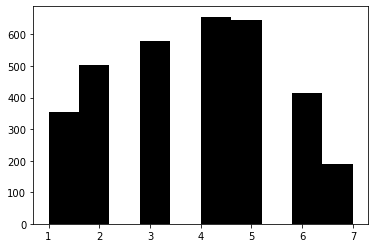

# Convert timestamps to pandas datetimes

In [43]:
cat_clus_all_nodupes = cat_clus_all_nodupes_2stations

cat_clus_all_nodupes['timestamp'] = pd.to_datetime(cat_clus_all_nodupes[['year','month','day','hour','minute','second']])
cat_clus_all_nodupes['timestamp_index'] = pd.to_datetime(cat_clus_all_nodupes[['year','month','day','hour','minute','second']])
cat_clus_all_nodupes.set_index('timestamp_index',inplace=True)


cat_clus_ALL_stats_RID = cat_clus_all_nodupes[cat_clus_all_nodupes.RID!='0']
cat_clus_ALL_stats_noRID = cat_clus_all_nodupes[cat_clus_all_nodupes.RID=='0']



# Plot cumulative number of repeating earthquakes over time

Text(0, 0.5, 'Cumalitive # earthquakes')

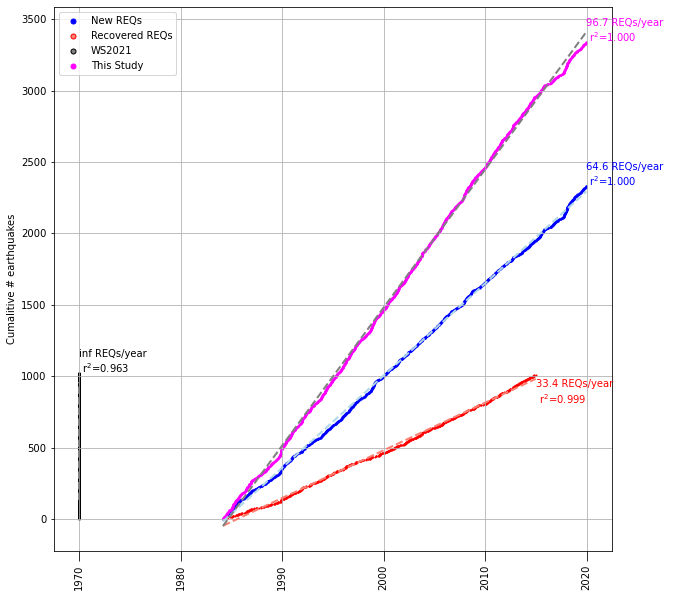

In [45]:


plt.figure(figsize=(10,10))
ax4=plt.gca()




slope, r, dates = plotCumul2(cat_clus_ALL_stats_noRID,'blue','lightblue',ax=ax4);
ax4.text(dates[-1],len(cat_clus_ALL_stats_noRID),s=f"{slope:.1f} REQs/year \n r$^2$={r:.3f}",color='blue')

slope2, r2, dates2 = plotCumul2(cat_clus_ALL_stats_RID,'red','salmon',ax=ax4);
ax4.text(dates2[-1],len(cat_clus_ALL_stats_RID)-200,s=f"{slope2:.1f} REQs/year \n r$^2$={r2:.3f}",color='r')


## oops need to convert these to pandas timestamps
# slope3, r3, dates3 = plotCumul2(cat_WS21,'k','gray',ax=ax4);
# ax4.text(dates3[-1],len(cat_WS21),s=f"{slope3:.1f} REQs/year \n r$^2$={r3:.3f}",color='k')

slope4, r4, dates4 = plotCumul2(cat_clus_all_nodupes,'fuchsia','gray',ax=ax4);
ax4.text(dates[-1],len(cat_clus_all_nodupes),s=f"{slope4:.1f} REQs/year \n r$^2$={r4:.3f}",color='fuchsia')



legend_elements = [
                   Line2D([0], [0], marker='.', color='blue', label=r'New REQs',markerfacecolor='blue', markersize=10,lw=0),                                      
                   Line2D([0], [0], marker='.', color='r', label=r'Recovered REQs',markerfacecolor='salmon', markersize=10,lw=0),
                   Line2D([0], [0], marker='.', color='k', label='WS2021',markerfacecolor='gray', markersize=10,lw=0),
                   Line2D([0], [0], marker='.', color='fuchsia', label='This Study',markerfacecolor='fuchsia', markersize=10,lw=0)]


ax4.legend(handles=legend_elements)
# ax4.set_ylim(0,1100)
ax4.grid('on')
ax4.set_ylabel('Cumalitive # earthquakes')    


# Rename clusters (and calculate cluster statistics)

In [48]:
cat_clus_all_nodupes['Cluster_2'] = [cl for cl in cat_clus_all_nodupes.Cluster]
cat_clus_all_nodupes = calcDfStats(cat_clus_all_nodupes,timeMin=0)

cat_fin = pd.DataFrame()


clus_name = 0

len_cluster = []

for i,clus in enumerate(set(cat_clus_all_nodupes.Cluster)):
    
    clus_name = f"{i:05d}"

    df_cl = cat_clus_all_nodupes[cat_clus_all_nodupes.Cluster==clus]
    
    df_cl['Cluster_2'] = clus_name
    
    
    len_cluster.append(len(df_cl))
    cat_fin = cat_fin.append(df_cl)
    



cat_fin_new = cat_fin[cat_fin.RID=='0'].copy()


0/496
50/496
100/496
150/496
200/496
250/496
300/496
350/496
400/496
450/496
3340 3340


# Rename clusters from WS21 to match This Study

In [9]:


cat_fin_WS = pd.DataFrame()
for cl in np.unique(cat_fin_new.Cluster_2):
    df_cl = cat_fin[cat_fin.Cluster_2==cl]
    Rs = np.unique(df_cl.RID)
    
    for r in Rs:
        df_R = cat_WS21[cat_WS21.RID==r]
        
        df_cl = df_cl.append(df_R)
        
    
    df_cl.Cluster_2 = cl
    
    cat_fin_WS = cat_fin_WS.append(df_cl)
    
    

# Save Catalog

In [60]:
cat_fin.to_csv('../data/catalogs/combined_Catalog_expNum_BSG.csv')


# Calc some catalog stats

In [65]:
cat_fin['timestamp'] = pd.to_datetime(cat_fin[['year','month','day','hour','minute','second']])
cat_fin['timestamp_index'] = pd.to_datetime(cat_fin[['year','month','day','hour','minute','second']])
cat_fin.set_index('timestamp_index',inplace=True)

cat_fin_stats = calcDfStats(cat_fin, timeMin=0, NCl=2)

# Moment and recurrence interval, model is from Nadeau 1994 (?)

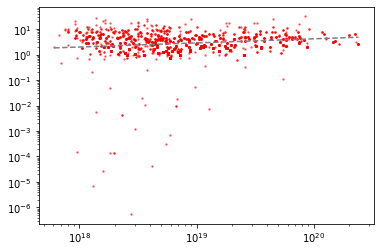

In [252]:
ax = plt.gca()


catt = cat_fin_stats[cat_fin_stats.time_diff_yr!=0]

ax.scatter(catt.moment_avg,catt.time_mean_yr, s=2,color='r',alpha=.5)

x = np.linspace(min(catt.moment_avg),max(catt.moment_avg),1000) 
y = .0025 * x ** .161 


ax.plot(x,y,color='grey',linestyle='--')


ax.set_xscale('log')
ax.set_yscale('log')


# ax.set_ylim(1e-1,1*10**2)
# ax.set_xlim(1e17,1e21)

# Save files formatted for HypoDD relocation 

In [69]:
pathCat = '../data/catalogs/'

i = 0

saveSelFile = 1


for clus in np.unique(cat_fin_stats.Cluster_2):
    
    df_cl = cat_fin_stats[cat_fin_stats.Cluster_2==clus]
    

    clusterName = 'Rx.16.' + df_cl.Cluster_2.iloc[0]

    if not os.path.exists(f"{pathCat}/{clusterName}/"):
        os.makedirs(f"{pathCat}/{clusterName}/")    

    ev_cat = pd.DataFrame(df_cl['event_ID'])

    ev_cat['event_ID'] = [int(d) for d in ev_cat.event_ID]

    ev_cat.set_index('event_ID',inplace=True)
    
    if saveSelFile:
        ev_cat.to_csv(f"{pathCat}/{clusterName}/events.select",header=False)


# Run HypoDD

In [ ]:
### hypoDD.inp


In [7]:
# # README

# #---Relocate clusters of repeating events found by specufex using the 
# #   NCAeqDD.2021 data base: 

# #--- Create new directory for cluster to be relocated/tested: 
# #    Rx.0001, Rx.0002,...
# mkdir Rx.0001
# cd Rx.0001

# #--- In that directory, create file 'events.select' with IDs of events to 
# #    be relocated, one ID per line per ID..

# #--- Get all phase picks for the events:
# ../src/sel_pha_id /data/hy71/felixw/NCSN/2021/data/picks/pha.sel events.select pha.sel

# #--- Get all correlation delay times for the events:
# ../src/run_sel_dt_id_fast_bin.sh; ./cmd

# #--- Get all stations that recorded the events:
# cat pha.sel dt.cc | sed "/#/d" | awk '{print $1}' | sort -u -k 1,1 >! sta
# ../src/sel_sta sta /data/hy71/felixw/NCSN/2021/data/picks/sta.all sta.sel

# #--- Generate pick delay times (dt.ct):
# ../src/HYPODD/src/ph2dt/ph2dt ph2dt.inp

# #--- Relocate:
# ../src/HYPODD/src/hypoDD/hypoDD hypoDD.inp

# Make relocated catalog

~ Load hypoDD output files

~ Remove M+/-.3


In [70]:
listClust = [f"{N:05d}" for N in range(len(pd.unique(cat_fin_stats.Cluster_2)))]

In [72]:
cols = ['event_ID', 'lat', 'long', 'depth_km', 'X', 'Y', 'Z', 'dX', 'dY', 'dZ', 'year','month','day','hour','minute','second',\
'magnitude', 'NCCP', 'NCCS', 'NCTP','NCTS', 'RCC', 'RCT', 'RID']
reloc_cat = pd.DataFrame()
err = 0 #count number of nonrelocated sequences
listClust = [f"{N:05d}" for N in range(len(pd.unique(cat_fin_stats.Cluster_2)))]
plot=0

for clus in listClust:
    try:

        clusterName = 'Rx.0.' + clus

        reloc_cat_temp = pd.read_csv(f"{pathCat}/Rx16/{clusterName}/hypoDD.reloc",sep="\s+",names=cols)
        reloc_cat_temp.drop(index=reloc_cat_temp[reloc_cat_temp.dZ=='********'].index,inplace=True)



        df_cl_CLus = cat_fin_stats[cat_fin_stats.event_ID==reloc_cat_temp.event_ID.iloc[0]].Cluster_2
        df_cl = cat_fin_stats[cat_fin_stats.Cluster_2==df_cl_CLus.array[0]]



        if len(df_cl)==len(reloc_cat_temp):
            reloc_cat_temp['Cluster_2'] = [df_cl.Cluster_2.iloc[0] for i in range(len(reloc_cat_temp))]
            reloc_cat_temp['RID'] = [r for r in df_cl['RID']]
            reloc_cat_temp['NumStations'] = [r for r in df_cl['NumStations']]
            reloc_cat_temp['CVr'] = [r for r in df_cl['CVr']]


            reloc_cat_temp['timestamp_index'] = pd.to_datetime(reloc_cat_temp[['year','month','day','hour','minute','second']])
            reloc_cat_temp = reloc_cat_temp.set_index('timestamp_index')

            ###### PLOTPLOTPOLT
            ###### PLOTPLOTPOLT
            ###### PLOTPLOTPOLT
            if plot:
                fig = plt.figure(constrained_layout=True,figsize=(8,6))

                gs = GridSpec(2, 3, figure=fig)
                ax1 = fig.add_subplot(gs[0,0])
                ax2 = fig.add_subplot(gs[0,1])
                ax3 = fig.add_subplot(gs[0,2])

                plotLocZoom5(reloc_cat_temp,reloc_cat_temp,fontsize=12,buff=.0015,ax=ax1)
                plotDepthZoom8(reloc_cat_temp,reloc_cat_temp,fontsize=12,buff=.015,ax=ax2)

                plotStem5(reloc_cat_temp,
                    np.unique(cat_WS21_stats.RID),
                    set(df_cl[df_cl.RID!='0'].RID),
                    df_cl,
                    fontsize=12,
                    ax=ax3)  

                ax2.set_title(f"Cluster {cl}")
    #                 plt.savefig(f"../reports/figures/relocated_20230307_7stations/{clusterName}.png")

            reloc_cat = reloc_cat.append(reloc_cat_temp)
        else:
            print(f"{len(df_cl)} to {len(reloc_cat_temp)}")
    #         break
            pass
    except:
        err +=1 
        print(err, 'clusters not relocated')
        pass


1 clusters not relocated
26 to 25
43 to 42
34 to 33
9 to 8
2 clusters not relocated
43 to 42
23 to 21


In [78]:

reloc_cat.to_csv(pathCat + 'reloc_cat_final_Rx0_1Stations_20230325.csv') #7 stations

